<a href="https://colab.research.google.com/github/evonneng05/Customer-Segmentation-Analysis/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import math
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import plotly.express as px
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")

import scipy.cluster.hierarchy as hier
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import OPTICS

from google.colab import files

#Loading Dataset
CSV file can be downloaded from [Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)



In [ ]:
uploaded = files.upload()

Saving marketing_campaign.csv to marketing_campaign.csv


In [ ]:
data = pd.read_csv('marketing_campaign.csv', sep='\t')
print("Number of data points: ", len(data))
data.head()

Number of data points:  2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#Exploratory Data Analysis
*  Quick summary of the dataset values- identify columns that need to be preproccessed
*  Income Column has null values
*  Identified non-numerical columns: Education, Marital_Status, Dt_Customer

In [ ]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
data["Dt_Customer"].describe()

count           2240
unique           663
top       31-08-2012
freq              12
Name: Dt_Customer, dtype: object

In [ ]:
print("Datatypes in dataset:\n", data.dtypes)
print("\nNumber of missing values in dataset:\n", data.isnull().sum())
print("\nNumber of unique values in dataset:\n", data.nunique())
print("\nDimension of dataset:\n", data.shape)

Datatypes in dataset:
 ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Number of missing values in dataset:
 ID                      0

#Preprocessing Data Pt 1


*   Modified Columns:
 *  Membership Duration- number of days from 1st Jan 2021 (from Dt_Customer)
 *  Age- number of years from 2021 (From Year_Birth)
 *  RelationshipStatus- single or duo (from Marital_Status)
 * Education- First, Second or Third Cycle
*  New Columns
 * PurchaseQty= Sum of Purchase Columns
 * NumOfChildren= kidhome + Teenhome
 * FamilySize= NumOfChildren + RelationshipStatus (1 for single, 2 for duo)
 * Expenditure= Sum of Product Columns
 * AcceptedCmpAll= combine campaigns 1-5 and Response
* One Hot Encode Categorical Columns
  * Columns: Education, RelationshipStatus
*   Replacement of null values with the column's median 
 * Columns with null values: Income




In [ ]:
cleanData= data.copy()
cleanData["Income"].fillna(cleanData["Income"].median(), inplace=True)

# MembershipDuration Column- Dataset released 2 years ago
cleanData["Dt_Customer"] = pd.to_datetime(cleanData['Dt_Customer'], format='%d-%m-%Y')
cleanData["MembershipDuration"]=(pd.Timestamp(2021,1,1).normalize()-cleanData['Dt_Customer']).dt.days.astype('int')

# Age Column- Dataset released 2 years ago
cleanData["Age"]=2021-cleanData["Year_Birth"]
# combine amount spent across categories- fish wine fruits, sweets, gold
cleanData["Expenditure"]= cleanData["MntWines"]+ cleanData["MntFruits"]+cleanData["MntMeatProducts"]+cleanData["MntSweetProducts"]+cleanData["MntGoldProds"]

# RelationshipStatus Column: single or duo
cleanData["Marital_Status"]=cleanData["Marital_Status"].replace(["Together", "Married"],"Duo")
cleanData["Marital_Status"]=cleanData["Marital_Status"].replace(["Single", "Divorced","Widow","Alone","Absurd","YOLO"],"Single")
cleanData["RelationshipStatus"]=cleanData["Marital_Status"]

# Education Column: First(undegraduate and graduation), Second(masters) and Third (phd)
cleanData["Education"]= cleanData["Education"].replace(["Basic","Graduation"],"FirstCycle")
cleanData["Education"]= cleanData["Education"].replace(["2n Cycle","Master"],"SecondCycle")
cleanData["Education"]= cleanData["Education"].replace(["PhD"],"ThirdCycle")

# PurchaseQty Column:
cleanData["PurchaseQty"]= cleanData["NumWebPurchases"]+ cleanData["NumCatalogPurchases"]+ cleanData["NumStorePurchases"]

# NumOfChildren Column:
cleanData["NumOfChildren"]= cleanData["Kidhome"]+ cleanData["Teenhome"]

# FamilySize Column
cleanData["FamilySize"]= cleanData["NumOfChildren"]+(cleanData["RelationshipStatus"].replace({"Duo":2, "Single":1},inplace=False))

# AcceptedCmpAll Column:
cleanData["AcceptedCmpAll"]= cleanData["AcceptedCmp3"]+cleanData["AcceptedCmp1"]+cleanData["AcceptedCmp2"]+cleanData["AcceptedCmp4"]+cleanData["AcceptedCmp5"]+cleanData["Response"]
cleanData["AcceptedCmpAll"]=np.where(cleanData["AcceptedCmpAll"]>0,1,cleanData["AcceptedCmpAll"])

# Remove redundant Columns:
cleanData.drop(["ID","Year_Birth","Dt_Customer","Kidhome","Teenhome","Marital_Status","NumWebVisitsMonth","AcceptedCmp3","AcceptedCmp2","AcceptedCmp1","AcceptedCmp4","AcceptedCmp5","Response","Z_CostContact","Z_Revenue"],axis=1, inplace=True)

cleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Income               2240 non-null   float64
 2   Recency              2240 non-null   int64  
 3   MntWines             2240 non-null   int64  
 4   MntFruits            2240 non-null   int64  
 5   MntMeatProducts      2240 non-null   int64  
 6   MntFishProducts      2240 non-null   int64  
 7   MntSweetProducts     2240 non-null   int64  
 8   MntGoldProds         2240 non-null   int64  
 9   NumDealsPurchases    2240 non-null   int64  
 10  NumWebPurchases      2240 non-null   int64  
 11  NumCatalogPurchases  2240 non-null   int64  
 12  NumStorePurchases    2240 non-null   int64  
 13  Complain             2240 non-null   int64  
 14  MembershipDuration   2240 non-null   int64  
 15  Age                  2240 non-null   i

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
cleanData_cat = cleanData[['Education','RelationshipStatus']]
ohe.fit(cleanData_cat)
cleanData_c = pd.DataFrame(ohe.transform(cleanData_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(cleanData_cat.columns))
cleanData.drop(['Education','RelationshipStatus'], axis=1, inplace=True)
cleanData=pd.concat([cleanData, cleanData_c], axis=1)
cleanData.columns = cleanData.columns.str.replace("_","")
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Income                    2240 non-null   float64
 1   Recency                   2240 non-null   int64  
 2   MntWines                  2240 non-null   int64  
 3   MntFruits                 2240 non-null   int64  
 4   MntMeatProducts           2240 non-null   int64  
 5   MntFishProducts           2240 non-null   int64  
 6   MntSweetProducts          2240 non-null   int64  
 7   MntGoldProds              2240 non-null   int64  
 8   NumDealsPurchases         2240 non-null   int64  
 9   NumWebPurchases           2240 non-null   int64  
 10  NumCatalogPurchases       2240 non-null   int64  
 11  NumStorePurchases         2240 non-null   int64  
 12  Complain                  2240 non-null   int64  
 13  MembershipDuration        2240 non-null   int64  
 14  Age     

#Data Visualisation
* Plotted a Correlation Heat Map and Visualised Data Distribution

## Correlation Heat Map
* Identify any correlation between Columns

Findings:
*   Income and PurchaseQty have a high positive correlation
*   Income and Expenditure have a high positive correlation
*   Expenditure and AcceptedCmpAll have a moderate positive correlation
*   Expenditure and FamilySize/ NumOfChildren have a moderate negative correlation





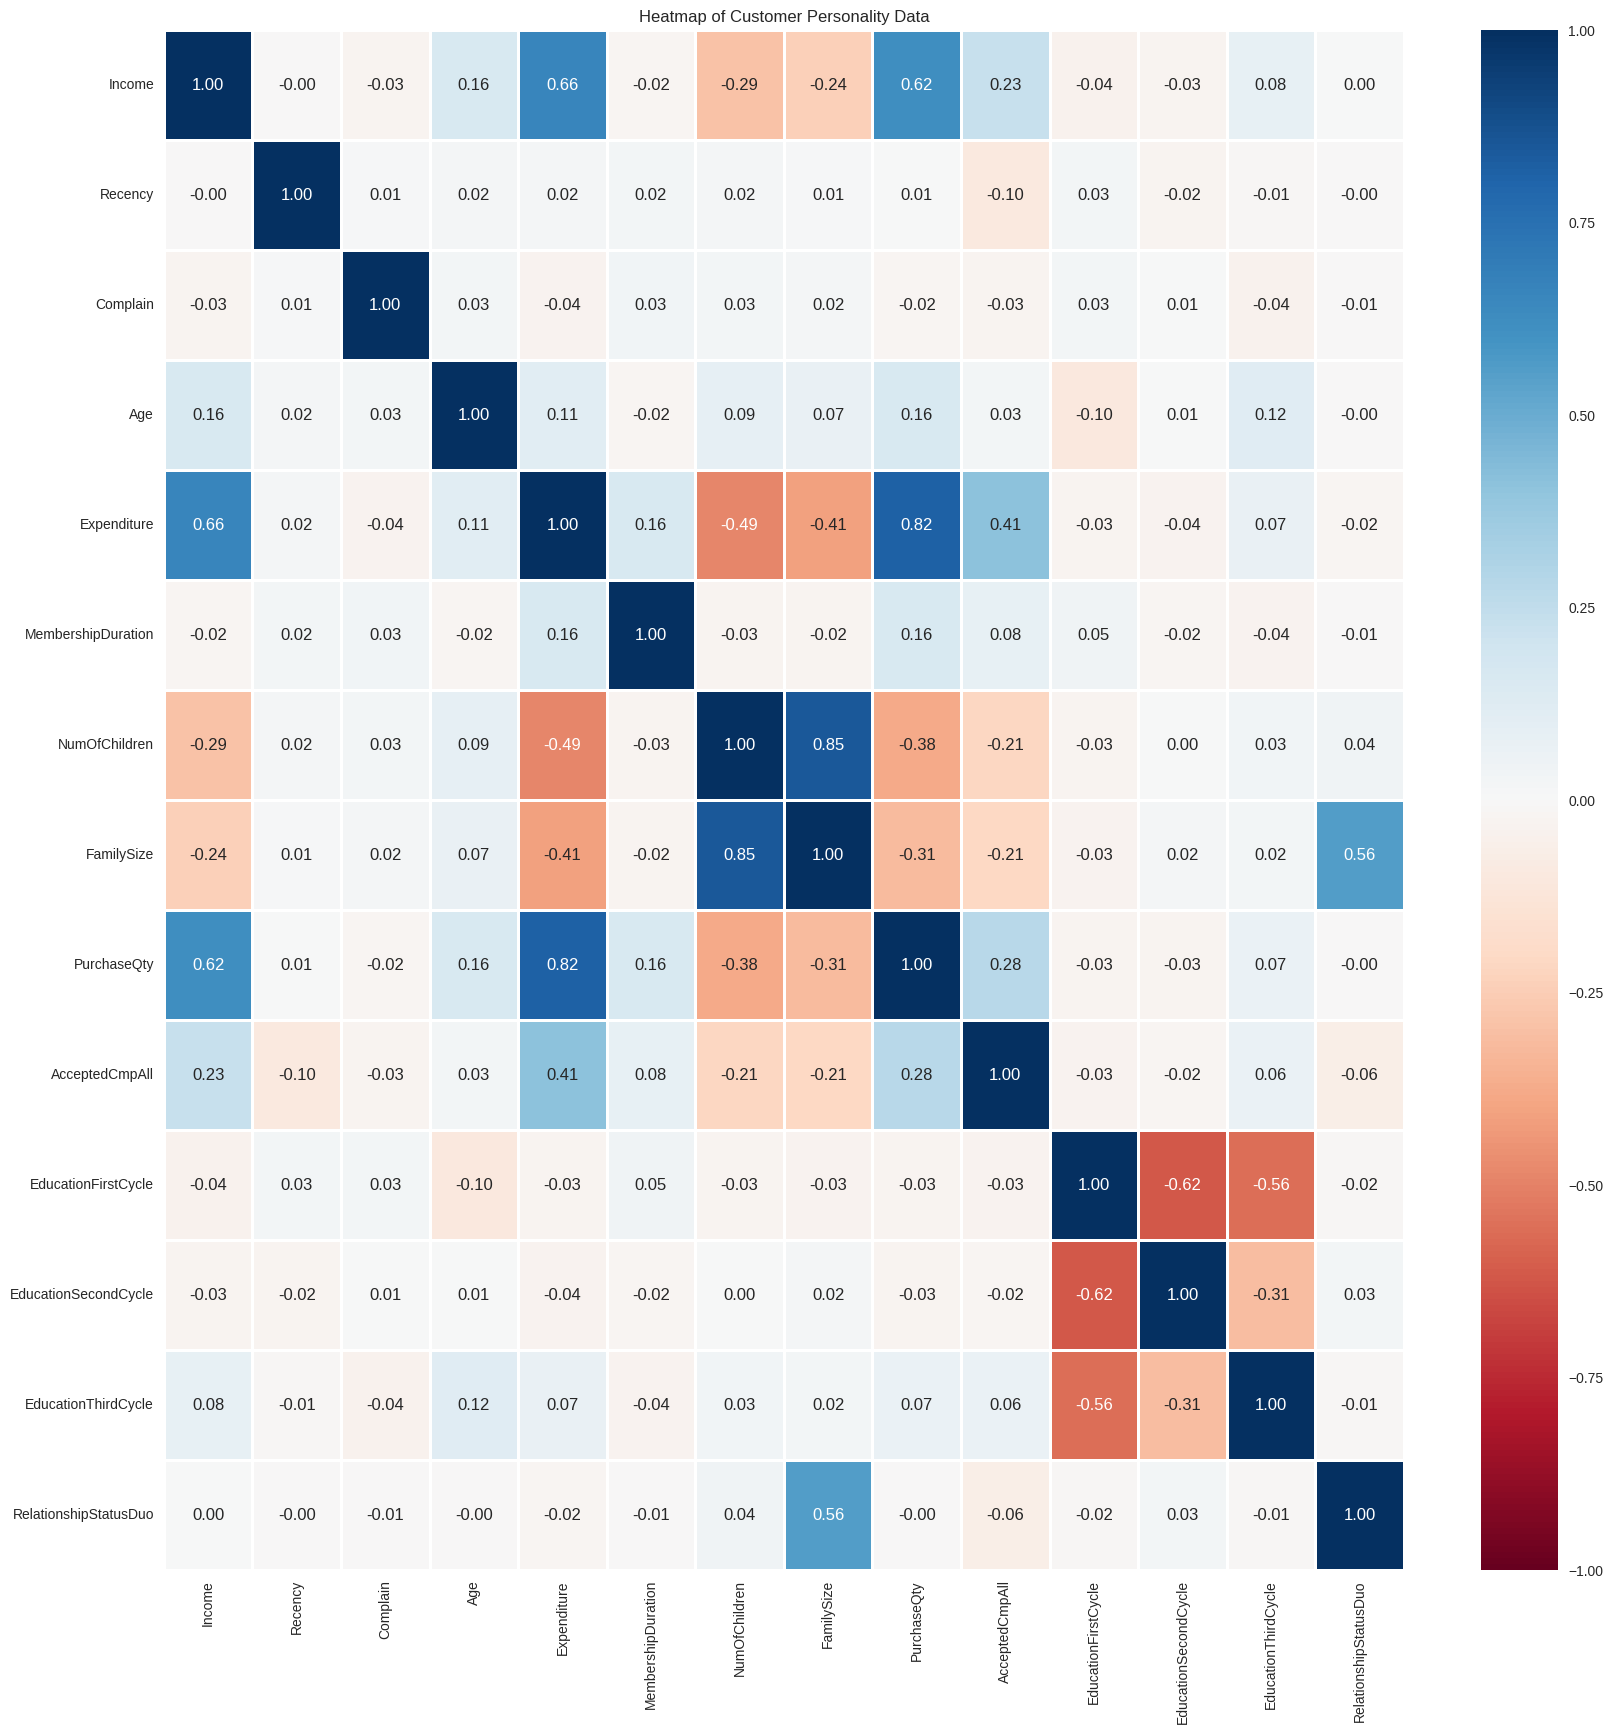

In [ ]:
corrData = cleanData[['Income','Recency', 'Complain', 'Age', 'Expenditure','MembershipDuration', 'NumOfChildren', 'FamilySize', 'PurchaseQty', 'AcceptedCmpAll', 'EducationFirstCycle','EducationSecondCycle','EducationThirdCycle','RelationshipStatusDuo']]
f = plt.figure(figsize=(20, 20))
ax = sb.heatmap(corrData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", cmap = "RdBu")
plt.title("Heatmap of Customer Personality Data")
plt.show()

## Graphical Visualisation of Data Distribution
* Leveraged Box plots, KDE plots and violin plots on numerical columns

Findings:
* Presence of significant outliers in the Income and Age Columns
* Vastly different magnitude of values between Columns (Income vs Family Size)

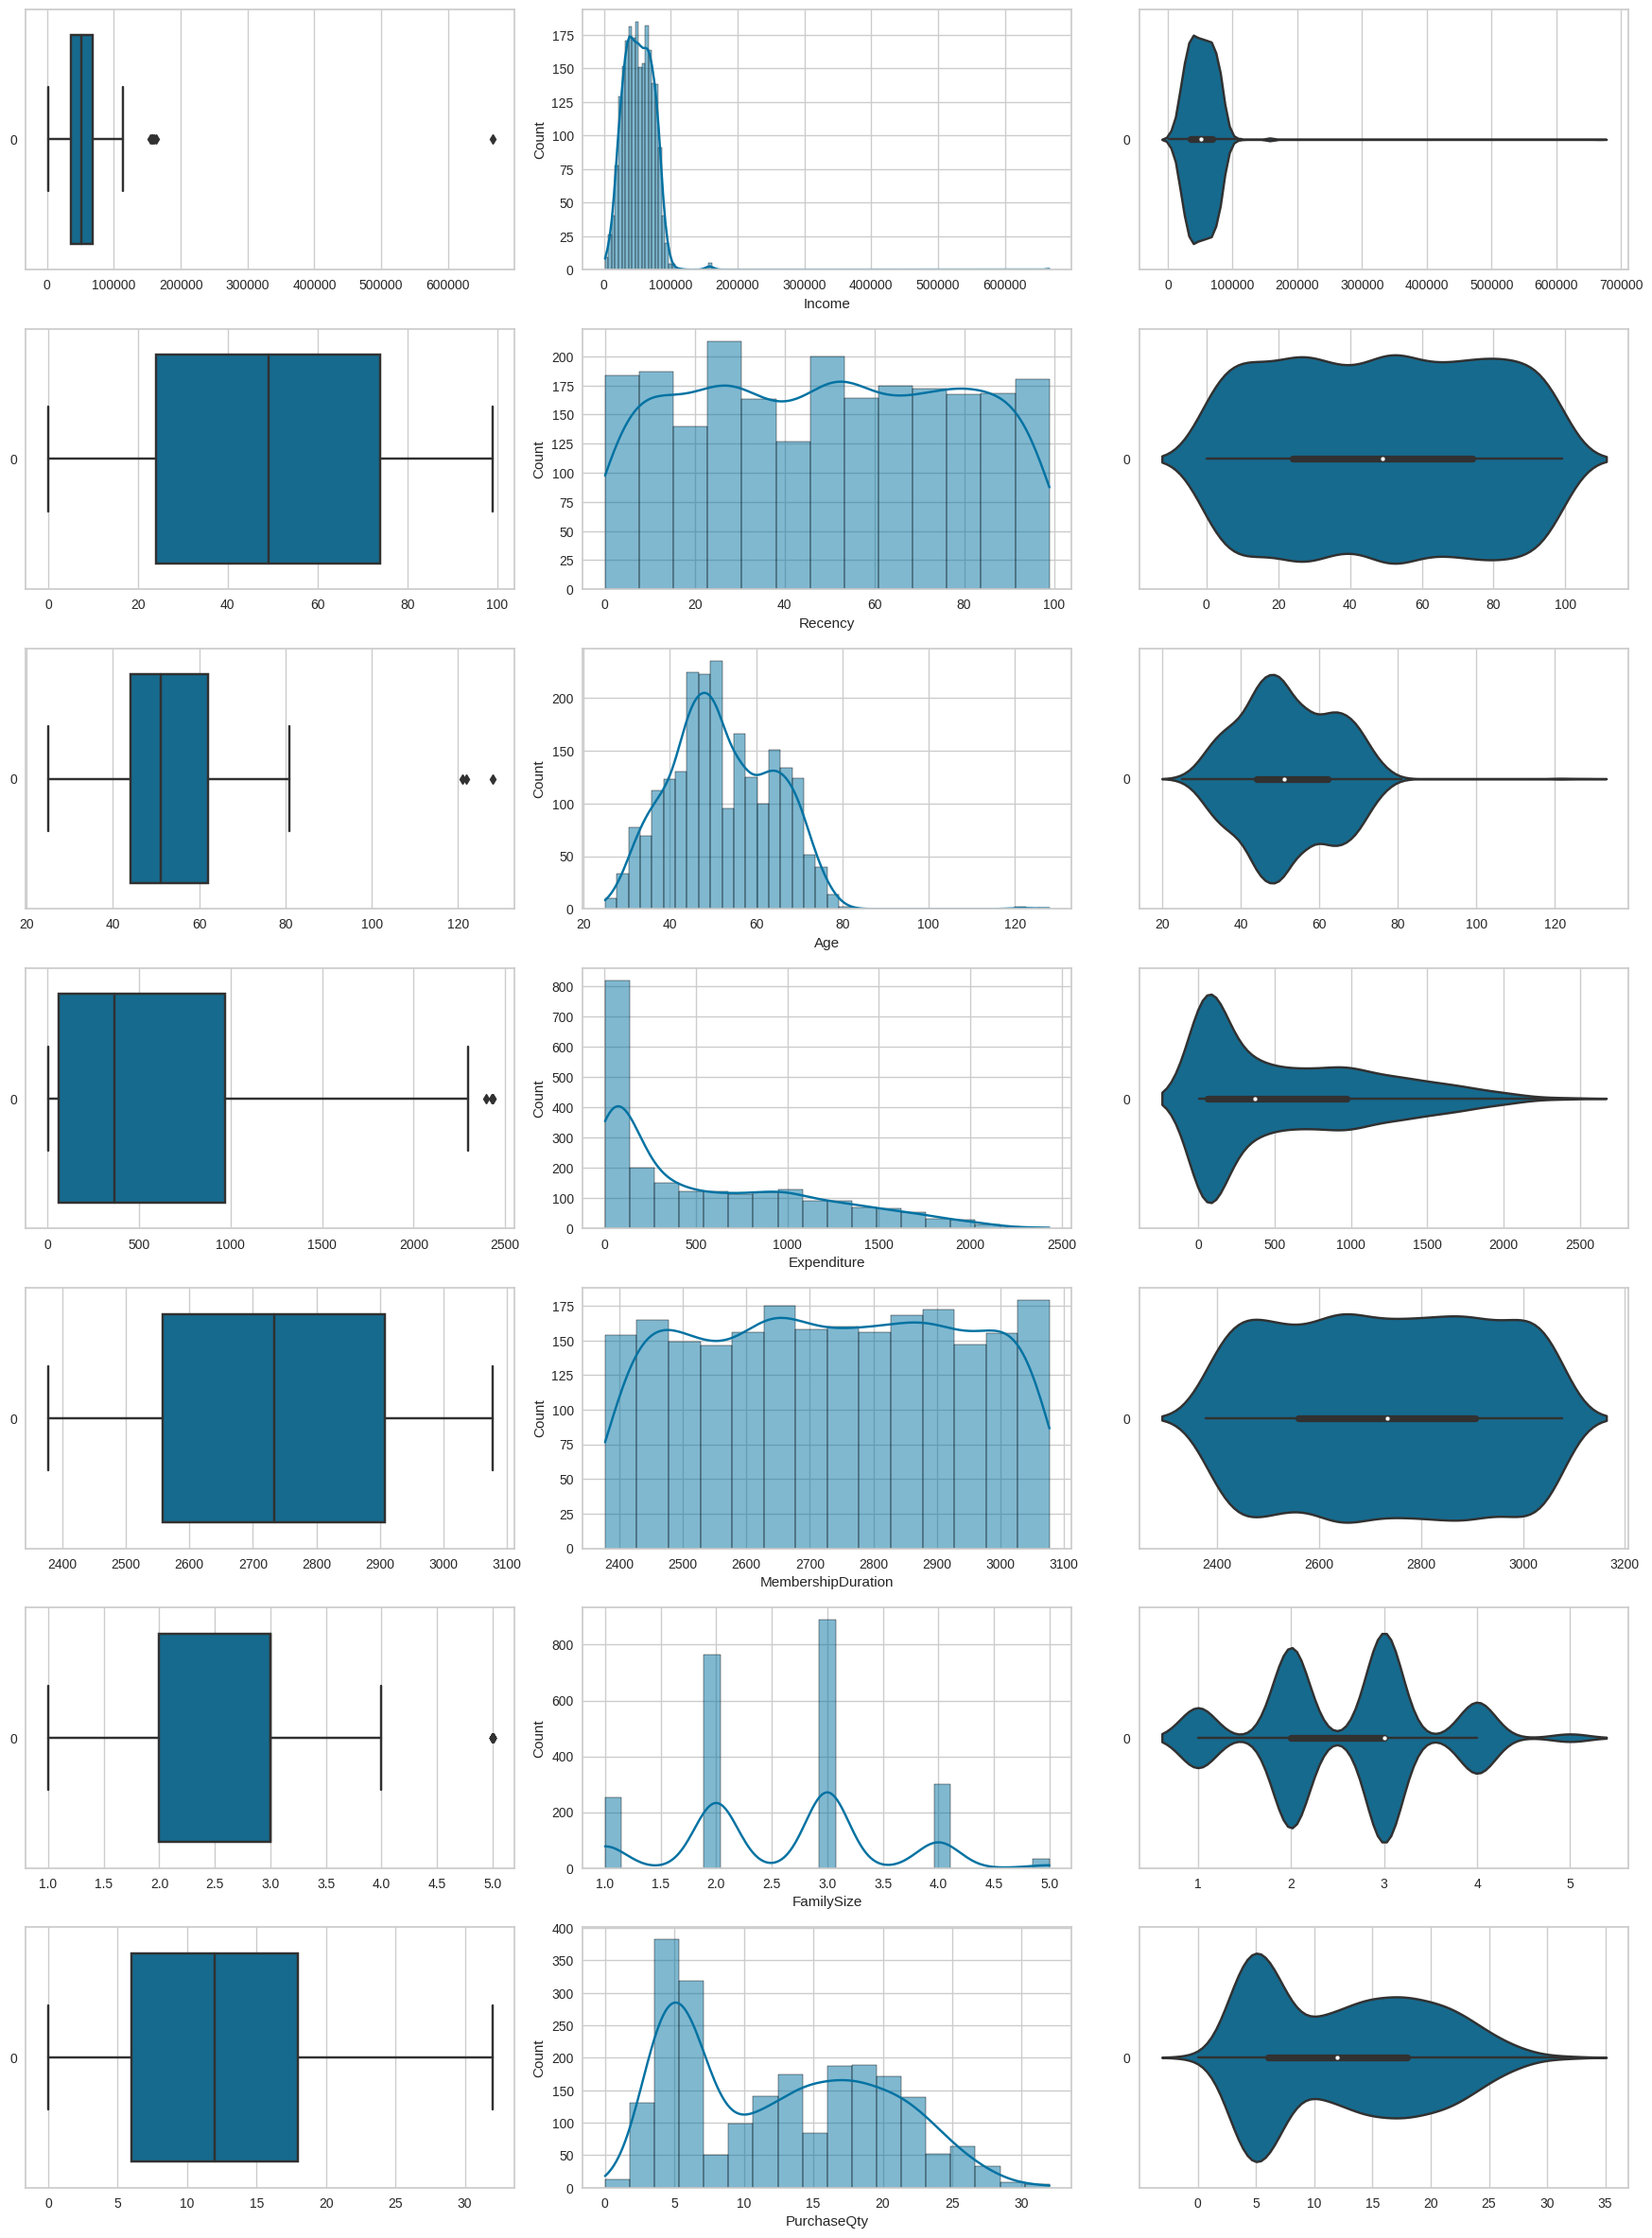

In [ ]:
numricalCorrData = cleanData[['Income','Recency', 'Age', 'Expenditure','MembershipDuration', 'FamilySize', 'PurchaseQty']]
f, axes = plt.subplots(7, 3, figsize=(18, 24))
f.tight_layout(pad=2.0)
for count, var in enumerate(numricalCorrData):
    sb.boxplot(data = numricalCorrData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numricalCorrData[var], ax = axes[count,1], kde = True)
    sb.violinplot(data = numricalCorrData[var], orient = "h", ax = axes[count,2])

#Data Preprocessing Pt 2
* Removal of  Outliers in Numerical Columns
 * Outliers are values outside the range (q1-1.5 x IQR, q3+1.5 x IQR)
 * Only for numerical outliers within customer demographic: (Age, Income, NumberOfChildren, FamilySize)
 * However FamilySize and NumOfChildren Columns were skipped as values are small; 1-5 and 0-3 respectively
* Standard Scaling of Numerical Columns

In [ ]:
outlierColumns=["Age","Income"] 
q1 = cleanData[outlierColumns].quantile(0.25)
q3 = cleanData[outlierColumns].quantile(0.75)
IQR = q3 - q1
cleanData = cleanData[~((cleanData[outlierColumns] < (q1 - 1.5*IQR)) | (cleanData[outlierColumns] > (q3 + 1.5*IQR))).any(axis=1)]

In [ ]:
numericalColumns=["Income","Recency","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","Age","Expenditure","MembershipDuration","NumOfChildren","FamilySize","PurchaseQty"]
ct = ColumnTransformer([ #prevent one hot encoded columns from being scaled
        ('scaler', StandardScaler(), numericalColumns)
    ], remainder='passthrough')
scaledCleanData=pd.DataFrame(ct.fit_transform(cleanData), columns=cleanData.columns, index=cleanData.index)
scaledCleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Income                    2229 non-null   float64
 1   Recency                   2229 non-null   float64
 2   MntWines                  2229 non-null   float64
 3   MntFruits                 2229 non-null   float64
 4   MntMeatProducts           2229 non-null   float64
 5   MntFishProducts           2229 non-null   float64
 6   MntSweetProducts          2229 non-null   float64
 7   MntGoldProds              2229 non-null   float64
 8   NumDealsPurchases         2229 non-null   float64
 9   NumWebPurchases           2229 non-null   float64
 10  NumCatalogPurchases       2229 non-null   float64
 11  NumStorePurchases         2229 non-null   float64
 12  Complain                  2229 non-null   float64
 13  MembershipDuration        2229 non-null   float64
 14  Age     

#Dimensionality Reduction
* Reduce large number of columns to insightful ones for better clustering results
* Consider Principal Components(PCs) that are able to provide more information than a variable's worth of information
* Shortedlisted 7 out of 25 PCs which accounts for 77.9% of dataset's explained variance

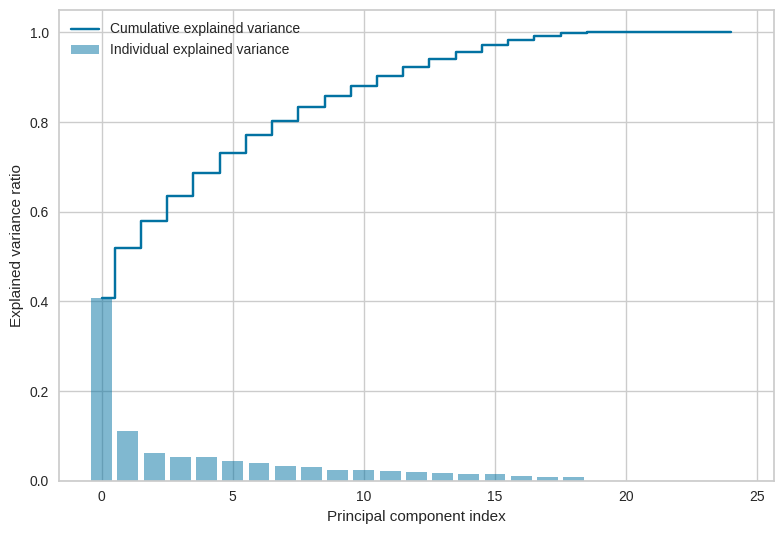

In [ ]:
pca = PCA()
pca.fit(scaledCleanData) #PCA transform all columns
exp_var_pca = pca.explained_variance_ratio_ #Explained variance contribution by each column
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
numPC=0
explained_variance=0
for pc in pca.explained_variance_ratio_:
  if (pc >= 1/25): #25 Columns contribute to 100% of data's explained variance
    numPC+=1
    explained_variance+=pc
print("We are considering the first {numPC} Principal Components, which contribute to {explainedVar:0.2f}% of the dataset's explained variance".format(numPC=numPC, explainedVar=explained_variance*100))

We are considering the first 7 Principal Components, which contribute to 77.03% of the dataset's explained variance


In [ ]:
pca = PCA(n_components=numPC)
pca.fit(scaledCleanData)
PCA_df = pd.DataFrame(pca.transform(scaledCleanData), columns=(["col1","col2","col3","col4","col5","col6","col7"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2229.0,-3.187720e-17,2.802148,-4.732698,-2.619691,-0.654689,2.455425,7.682144
col2,2229.0,5.100352e-17,1.469224,-3.603248,-1.082407,-0.173942,0.951400,5.952185
col3,2229.0,-2.311097e-17,1.086473,-3.092165,-0.764833,-0.006642,0.761596,4.737470
col4,2229.0,8.766229e-17,1.020675,-3.369521,-0.664389,-0.010477,0.665149,3.703201
col5,2229.0,3.825264e-17,1.003165,-2.734716,-0.799922,-0.002430,0.806817,2.735819
col6,2229.0,3.187720e-18,0.915132,-2.999371,-0.607703,0.048212,0.609765,3.045050
col7,2229.0,-7.969299e-19,0.881417,-4.139126,-0.575557,0.017632,0.564706,6.079704


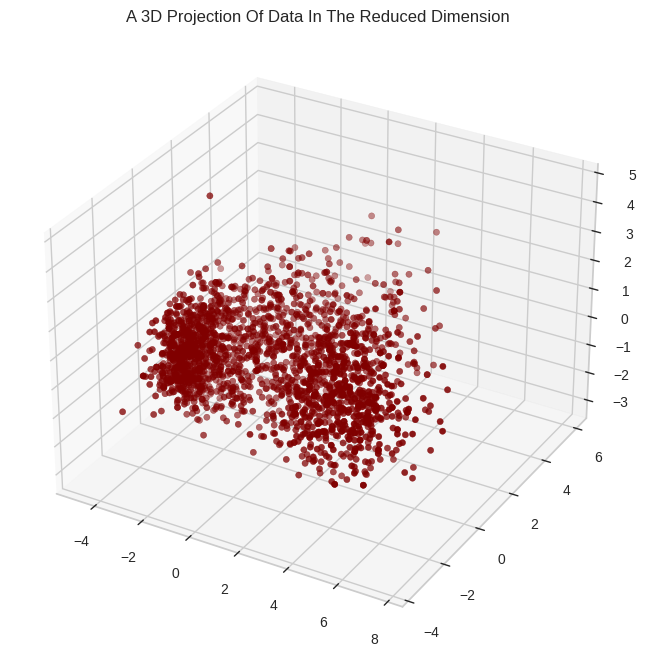

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

The identified number of principal components to use is 2 as seen from the Scree Plot, which accounts for >99.8% of explained variance.

#Finding Optimal Cluster Number

*   Used 3 methods, Elbow, Hierarchical Graph and Gap Statistic, to identify the optimal cluster number of 4



## Elbow Method
###How it works: 
For each value of cluster number K, the Within-Cluster Sum of Square (WCSS) is calculated. WCSS is the sum of the squared distance between each point and the centroid in the cluster. The WCSS for K between 1-10 is calculated and compared.

###Observations from graphs: 
As K increases, WCSS decreases. A turning point is located at K = 4 where after this point, the WCSS value decreases at a decreasing rate and the graph becomes parallel to x-axis. This is the optimal value of K.

###Functions used:
The KElbowVisualizer from Yellowbrick library is used. The parameters are the clustering method: KMeans() and the maximum cluster number we are testing, 10.

Reference: https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/ 

Find optimal cluster number using Elbow method


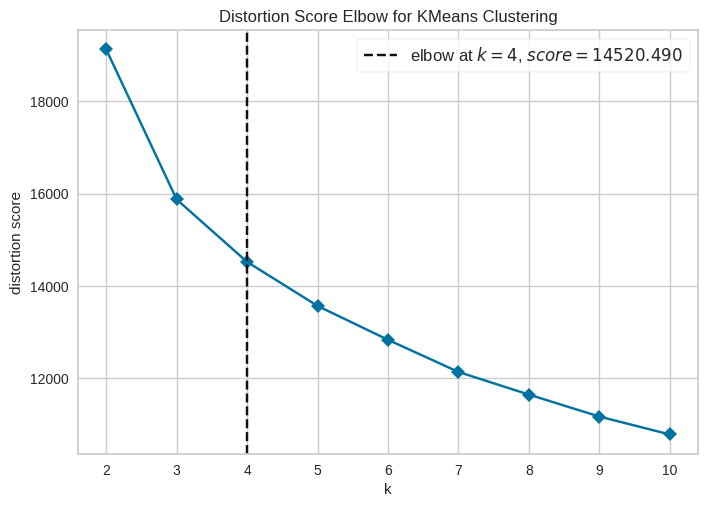

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#For each value of K, the Within-Cluster Sum of Square (WCSS) is calculated. WCSS is the 
#sum of the squared distance between each point and the centroid in the cluster.
#
print("Find optimal cluster number using Elbow method")
Elbow = KElbowVisualizer(KMeans(), k=10, timings=False)
Elbow.fit(PCA_df)
Elbow.show()

##Hierarchical Graph 
###How it works:
This method starts by considering each point as a separate cluster and starts joining points to clusters based on their euclidean distances. A dendrogram is used to show the sequences of merges or splits of clusters. If 2 clusters are merged, the dendrogram will join them and the height in the y-axis s the distance between the clusters.
###Observations from graphs:
From the graph, we can choose the optimal number of clusters based on its structure. We can observe that there are 4 distinct clusters which corroborates with the elbow method.
###Functions used:
The hierarchy method from the Scipy library is used.

Text(0, 0.5, 'Euclidean Distance')

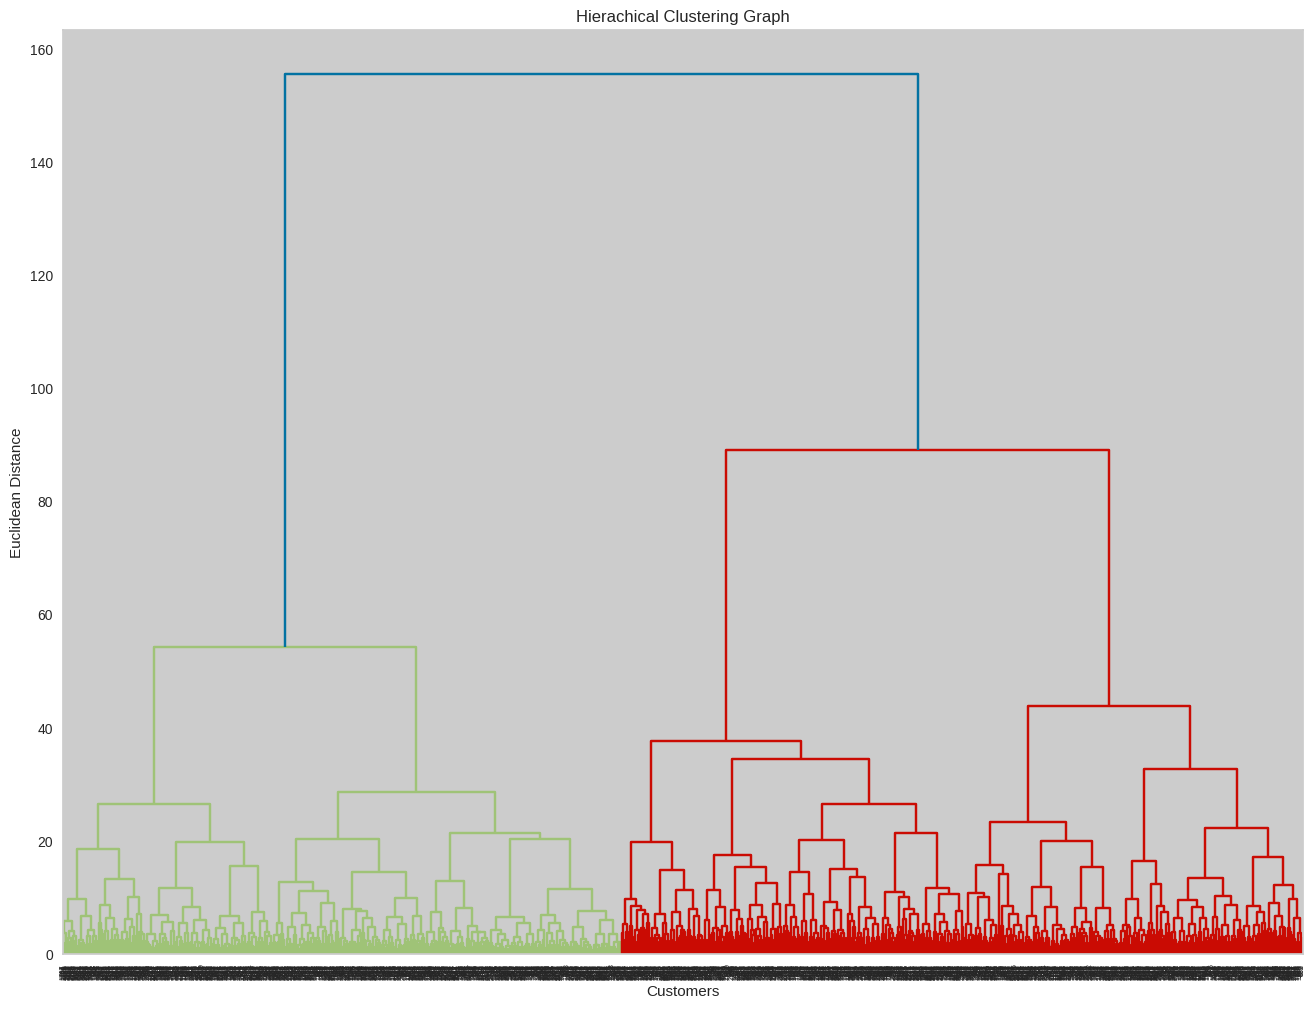

In [ ]:
#Ref: https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad
# Change figure size
plt.figure(figsize=(16,12))
# Fit the heirachical graph
heirachical_graph=hier.dendrogram(hier.linkage(PCA_df, method='ward')) #method='ward' uses the Ward variance minimization algorithm
# Add titles and labels
plt.title('Hierachical Clustering Graph')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')

##Gap Statistic Method
###How it works:
The Gap Statistic Method finds a way to compare cluster compactness with a null reference distribution of data. The optimal number of clusters is estimated by using the value for which cluster compactness falls the farthest below the reference curve. 
###Observations:
From the graph, after approximately 3 clusters, the graph is relatively flat, showing a diminishing gap increase. Hence the optimal number of clusters is 3 if we use this method.
###Functions used:
A notebook from Anaconda.org (https://anaconda.org/milesgranger/gap-statistic/notebook) was referenced to implement the gap statistics function.

In [ ]:
def optimalK(data, nrefs=3, maxClusters=5):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference) 
            refDisp = km.inertia_
            refDisps[i] = refDisp
        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)       
        origDisp = km.inertia_
        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap    
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

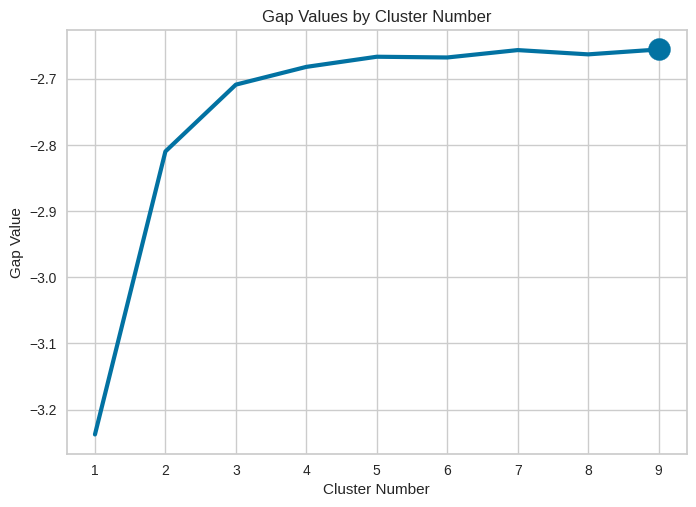

In [ ]:
k, gapdf = optimalK(PCA_df, maxClusters=10)
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250)
plt.grid(True)
plt.xlabel('Cluster Number')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Number')
plt.show()

####Even though gap statistic method gives an optimal cluster number of 3, both elbow method and hierarchical graph method gives an optimal cluster number of 4. Hence, moving forward, the optimal cluster number chosen is 4.

In [ ]:
clusterNum = 4

# Applying Clustering Algorithms
6 clustering algorithms across 5 clustering methods, to cluster dataset
* Connectivity/ Hierarchical Clustering
 * Agglomerative Clustering Model
* Centroid/ Partition Clustering- using the identified Cluster Number of 4
 * K-Means
 * Mean Shift
* Distribution Model
 * Gaussian Mixture Model
* Density Model
 * Ordering Points To Identify the Clustering Structure (OPTICS)
* Graph-based Model
 * Spectral Clustering

## Connectivity/ Hierarchical Clustering

### Agglomerative Clustering Model
A bottom-up approach where each object is initially considered a single-element cluster and clusters that are most simialr are iteratlively combined to form a node until all points are members of root clusters.

Relevant Tunable Parameters:
*   n_clusters: number of clusters to find

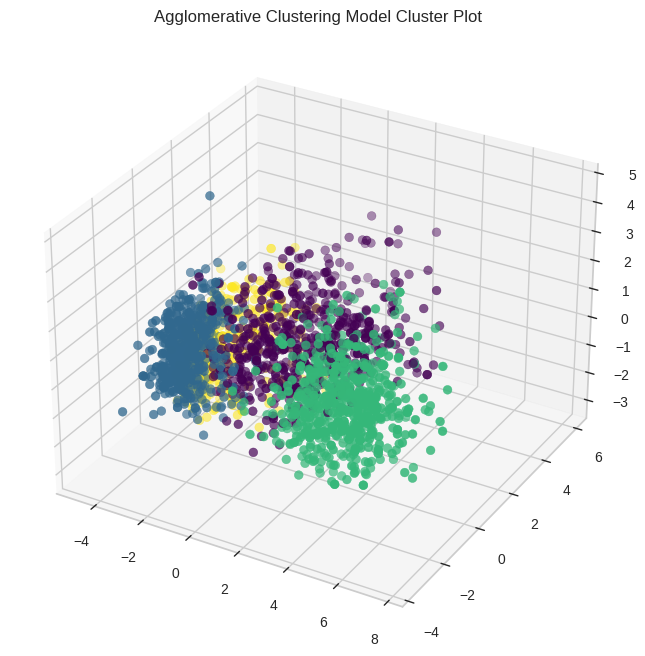

In [ ]:
AC = AgglomerativeClustering(n_clusters=clusterNum)

AC_df = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = AC_df

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z,s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("Agglomerative Clustering Model Cluster Plot")
plt.show()
PCA_df.drop(["Clusters"], axis=1,inplace = True)

## Centroid/ Partition Clustering
* using the identified Cluster Number of 4

### K-Means Clustering
A clustering algorithm to cluster objects such that the sum of squared distances between objects and their assigned cluster mean is minimised.

Relevant Tunable Parameters:
*   n_cluters: number of centroids to generate
*   init: method for initialization (random or k-means ++)

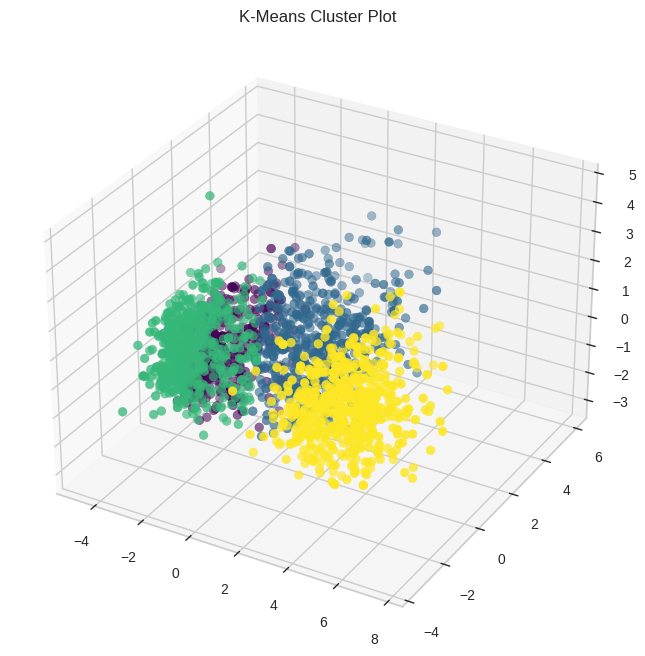

In [ ]:
kmeans = KMeans(n_clusters = clusterNum , init = 'k-means++')

Kmeans_df = kmeans.fit_predict(PCA_df)

PCA_df["Clusters"] = Kmeans_df
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z,s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("K-Means Cluster Plot")
plt.show()
PCA_df.drop(["Clusters"], axis=1,inplace = True)

In [ ]:
PCA_df.head()

,col1,col2,col3,col4,col5,col6,col7
0,5.061395,-0.527904,1.424181,0.080715,0.570635,-1.927534,-0.462299
1,-2.980915,-0.120238,-1.612098,-0.003251,-0.194869,-1.074581,0.212390
2,2.148290,-0.341719,-0.355742,-0.641135,-0.787680,-0.213917,0.662811
3,-2.810273,-0.938334,0.032026,0.224952,-1.127415,0.983750,0.343307
4,-0.236176,0.689972,-0.074883,1.293220,0.735535,1.383489,0.905571


#### Mean Shift
A centroid-based algorithm that assigns data points to clusters iteratively by shifting points towards the mode (high density of data points)

Tunable Parameters: NIL

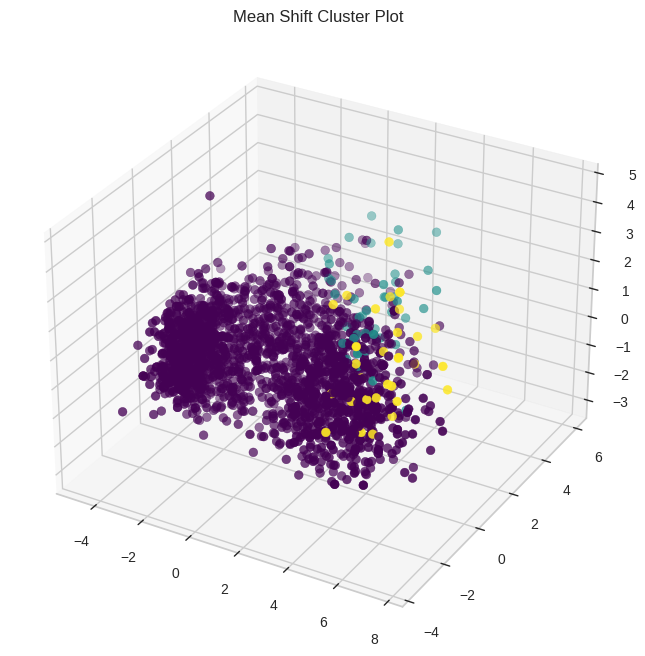

In [ ]:
MSP = MeanShift()

MSP_df = MSP.fit_predict(PCA_df)
PCA_df["Clusters"] = MSP_df

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y,z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("Mean Shift Cluster Plot")
plt.show()
PCA_df.drop(["Clusters"], axis=1,inplace = True)

##Distribution Model


### Gaussian Mixture Model
A distribution-based model for assigning data points to Gaussian distributions. Mean and variance for each assigned Gaussian distribution is obtained through Expectation-Maximization (EM).

Relevant Tunable Parameters:
*   n_components: number of mixture components
*   n_init: number of initilisations to perform
*   init_params: method to  initialise weights, means and precisions (kmeans, k-means++, random, random_from_data)

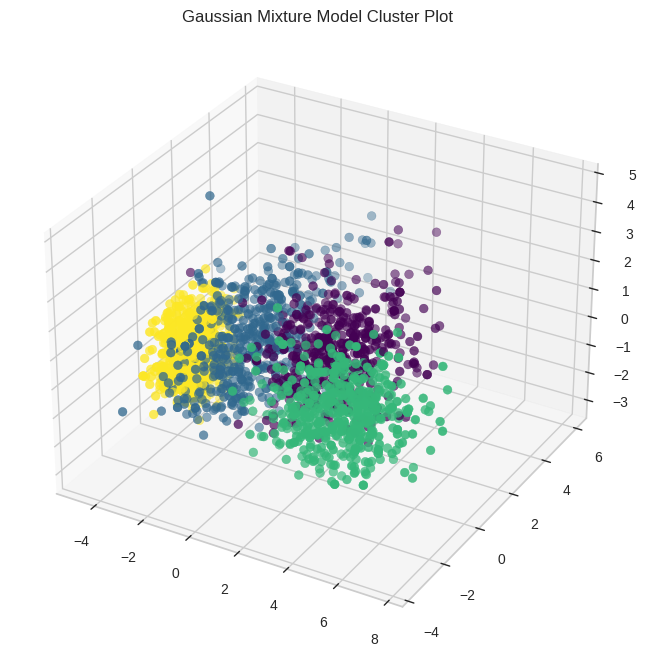

In [ ]:
GP = GaussianMixture(n_components=clusterNum, n_init= 5, init_params= "k-means++")

GP_df = GP.fit_predict(PCA_df)
PCA_df["Clusters"] = GP_df

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z,s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("Gaussian Mixture Model Cluster Plot")
plt.show()
PCA_df.drop(["Clusters"], axis=1,inplace = True)

##Density Model

### Ordering Points To Identify the Clustering Structure (OPTICS) 
A density-based clustering algorithm, similar to DBSCAN (Density-Based Spatial Clustering of Applications with Noise), It is useful for identifying clusters of different densities

Tunable Parameters:
*   min_samples: minimum number of points to form a dense region. Rule of thumb to be number of dimensions in the data set + 1.

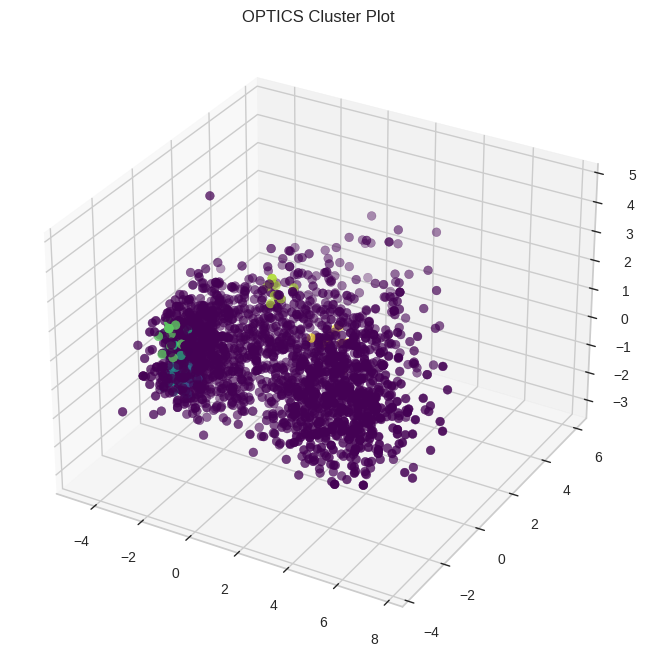

In [ ]:
minPt= 7+1
Optics_df= OPTICS(min_samples=minPt).fit_predict(PCA_df)
PCA_df["Clusters"] = Optics_df
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y,z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("OPTICS Cluster Plot")
plt.show()
PCA_df.drop(["Clusters"], axis=1,inplace = True)

##Graph-based Model

### Spectral Clustering
An algorithm that reduces complex multidimensional dataset into clusters of similar data in lower dimension. It uses of the spectrum of similarity matrix of data to perform dimensionality reduction  before clustering in fewer dimensions
Tunable Parameters:
*  n_clusters:

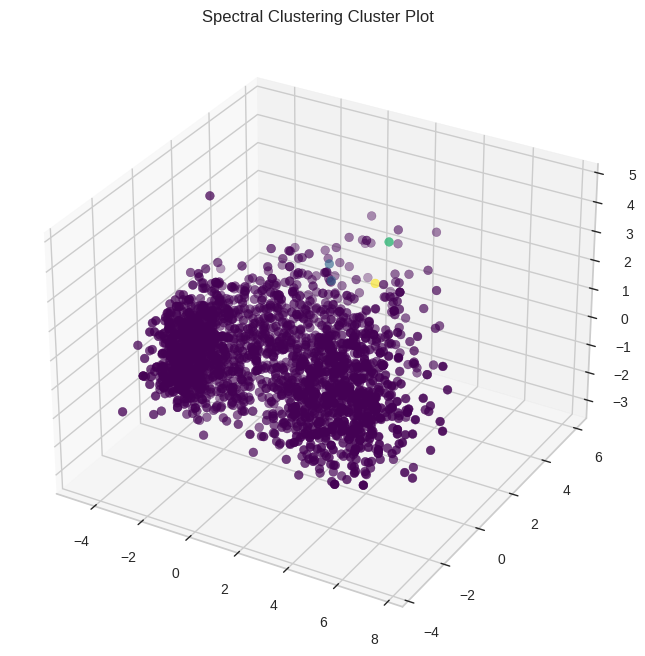

In [ ]:
SP = SpectralClustering(n_clusters=clusterNum)

SP_df = SP.fit_predict(PCA_df)
PCA_df["Clusters"] = SP_df

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y,z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("Spectral Clustering Cluster Plot")
plt.show()
PCA_df.drop(["Clusters"], axis=1,inplace = True)

# Evaluation of Clustering Algorithms
* Used 3 evaluation metrics: Silhouette score, Calinski Harabaz index and Davies-Bouldin Index, to evaluate the effectiveness of the 6 Clustering algorithms
* Concluded that K-Means Clustering algorithm produced the best results

##Silhouette Coefficient
*   Calculated by using the mean of the distance of the intra-cluster and nearest cluster for all the samples. 
*   The higher the Silhouette Coefficients, the better the model.

##Calinski Harabaz Index
*   Based on the principle of variance ratio: ratio is calculated between 2 paramters within-cluster diffusion and between cluster dispersion.
*   The higher the index, the better is clustering.

##Davies Bouldin Index
*   Based on the principle of with-cluster and between cluster distances
*   The smaller the index, the better the clustering.







In [ ]:
def Evaluate(data, labels):
  sil = silhouette_score(data,labels)
  ch = calinski_harabasz_score(data, labels)
  db = davies_bouldin_score(data, labels)
  print("Silhouette Score: {:<.3f}".format(sil))
  print("Calinski Harabasz Score: {:<.3f}".format(ch))
  print("Davies Bouldin Score: {:<.3f}".format(db))


In [ ]:
print("Centroid models:")
print("K Means Clustering")
Evaluate(PCA_df,Kmeans_df)
print("\nMean Shift")
Evaluate(PCA_df,MSP_df)
print("\nDensity models:")
print("OPTICS")
Evaluate(PCA_df,Optics_df)
print("\nGraph-based models:")
print("Spectral Clustering")
Evaluate(PCA_df,SP_df)
print("\nDistribution models:")
print("Gaussian Mixture Model")
Evaluate(PCA_df,GP_df)
print("\nConnectivity models:")
print("Agglomerative Clustering Model")
Evaluate(PCA_df,AC_df)

Centroid models:
K Means Clustering
Silhouette Score: 0.196
Calinski Harabasz Score: 948.661
Davies Bouldin Score: 1.632

Mean Shift
Silhouette Score: 0.136
Calinski Harabasz Score: 62.361
Davies Bouldin Score: 1.490

Density models:
OPTICS
Silhouette Score: -0.365
Calinski Harabasz Score: 9.684
Davies Bouldin Score: 1.406

Graph-based models:
Spectral Clustering
Silhouette Score: 0.217
Calinski Harabasz Score: 5.127
Davies Bouldin Score: 0.679

Distribution models:
Gaussian Mixture Model
Silhouette Score: 0.155
Calinski Harabasz Score: 816.138
Davies Bouldin Score: 2.030

Connectivity models:
Agglomerative Clustering Model
Silhouette Score: 0.178
Calinski Harabasz Score: 836.901
Davies Bouldin Score: 1.628


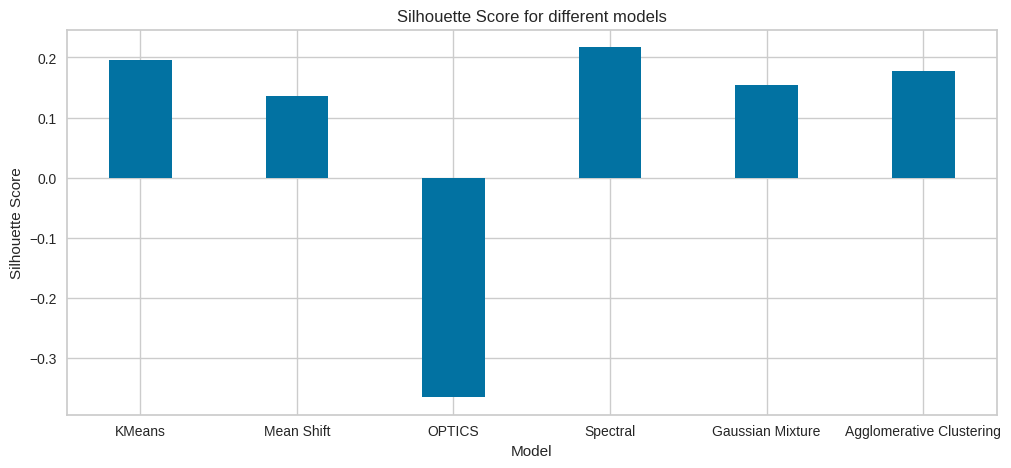

In [ ]:
model_names = ["KMeans","Mean Shift","OPTICS","Spectral","Gaussian Mixture","Agglomerative Clustering"]
models = [Kmeans_df,MSP_df,Optics_df,SP_df,GP_df,AC_df]
Sil = []
CH = []
DB = []
for i in models:
  Sil.append(round(silhouette_score(PCA_df,i),3))
  CH.append(round(calinski_harabasz_score(PCA_df, i),3))
  DB.append(round(davies_bouldin_score(PCA_df, i),3))

x_axis = np.arange(len(model_names))
fig = plt.figure(figsize = (12, 5))
plt.bar(x_axis, Sil, width=0.4)
plt.xticks(x_axis,model_names)
plt.xlabel("Model")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for different models")
plt.show()

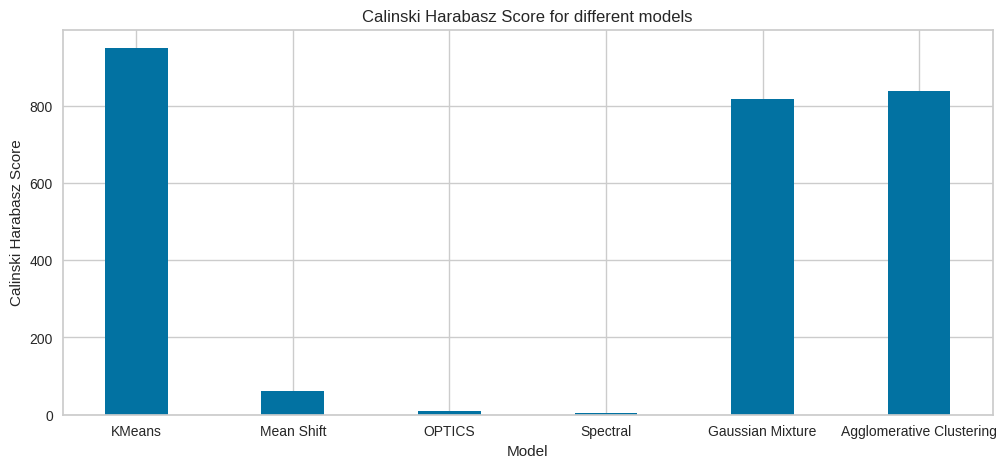

In [ ]:
x_axis = np.arange(len(model_names))
fig = plt.figure(figsize = (12, 5))
plt.bar(x_axis, CH, width=0.4)
plt.xticks(x_axis,model_names)
plt.xlabel("Model")
plt.ylabel("Calinski Harabasz Score")
plt.title("Calinski Harabasz Score for different models")
plt.show()

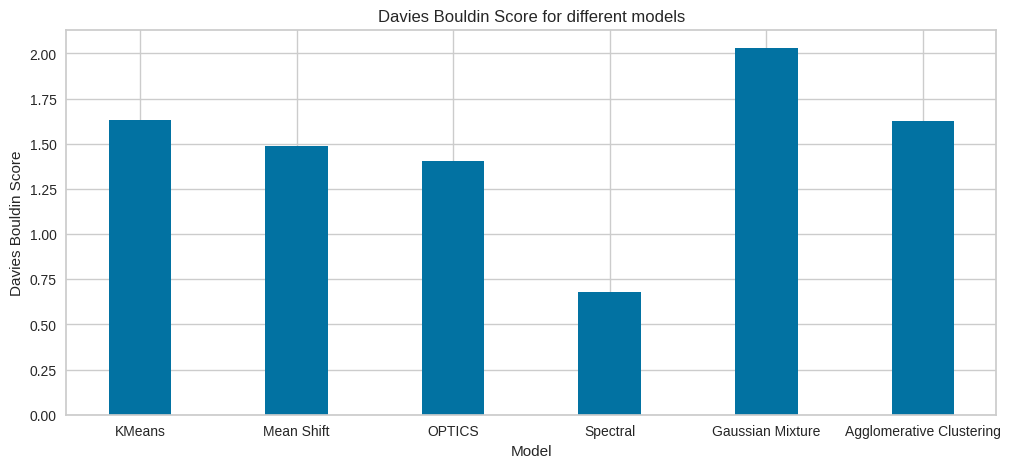

In [ ]:
x_axis = np.arange(len(model_names))
fig = plt.figure(figsize = (12, 5))
plt.bar(x_axis, DB, width=0.4)
plt.xticks(x_axis,model_names)
plt.xlabel("Model")
plt.ylabel("Davies Bouldin Score")
plt.title("Davies Bouldin Score for different models")
plt.show()

#Interpreting Results
* Making sense of the 4 clusters grouped by K-Means clustering

In [ ]:
cleanData["Cluster"] = Kmeans_df

### Profiling Customer Clusters
* Understanding which demographic trait one can use to identify the different cluster customers
* Found that Income, Age, NumOfChildren, EducationThirdCycle are the best indicators

Results:
* Cluster 0: 
 * Income: ~42K, Age: ~57, NumOfChildren: 1.9, Education Third-Cycle: 24.8%
* Cluster 1
 * Income: ~59K, Age: ~56, NumOfChildren: 1.1, Education Third-Cycle: 27.7%
* Cluster 2
 * Income: ~32K, Age: ~45, NumOfChildren: 0.8, Education Third-Cycle: 14.7%
* Cluster 3
 * Income: ~75K, Age: ~53, NumOfChildren: 0.2, Education Third-Cycle: 21%

In [ ]:
filteredDemoColumns=["Income","MembershipDuration","Age","NumOfChildren","EducationFirstCycle","EducationSecondCycle","EducationThirdCycle","RelationshipStatusDuo","RelationshipStatusSingle"] 
profileData={}
for i in range(clusterNum):
  clusterData= cleanData[cleanData["Cluster"]==i]
  for trait in filteredDemoColumns:
    if trait not in profileData:
      profileData[trait]=[]
    profileData[trait].append(round(clusterData[trait].mean(),3))

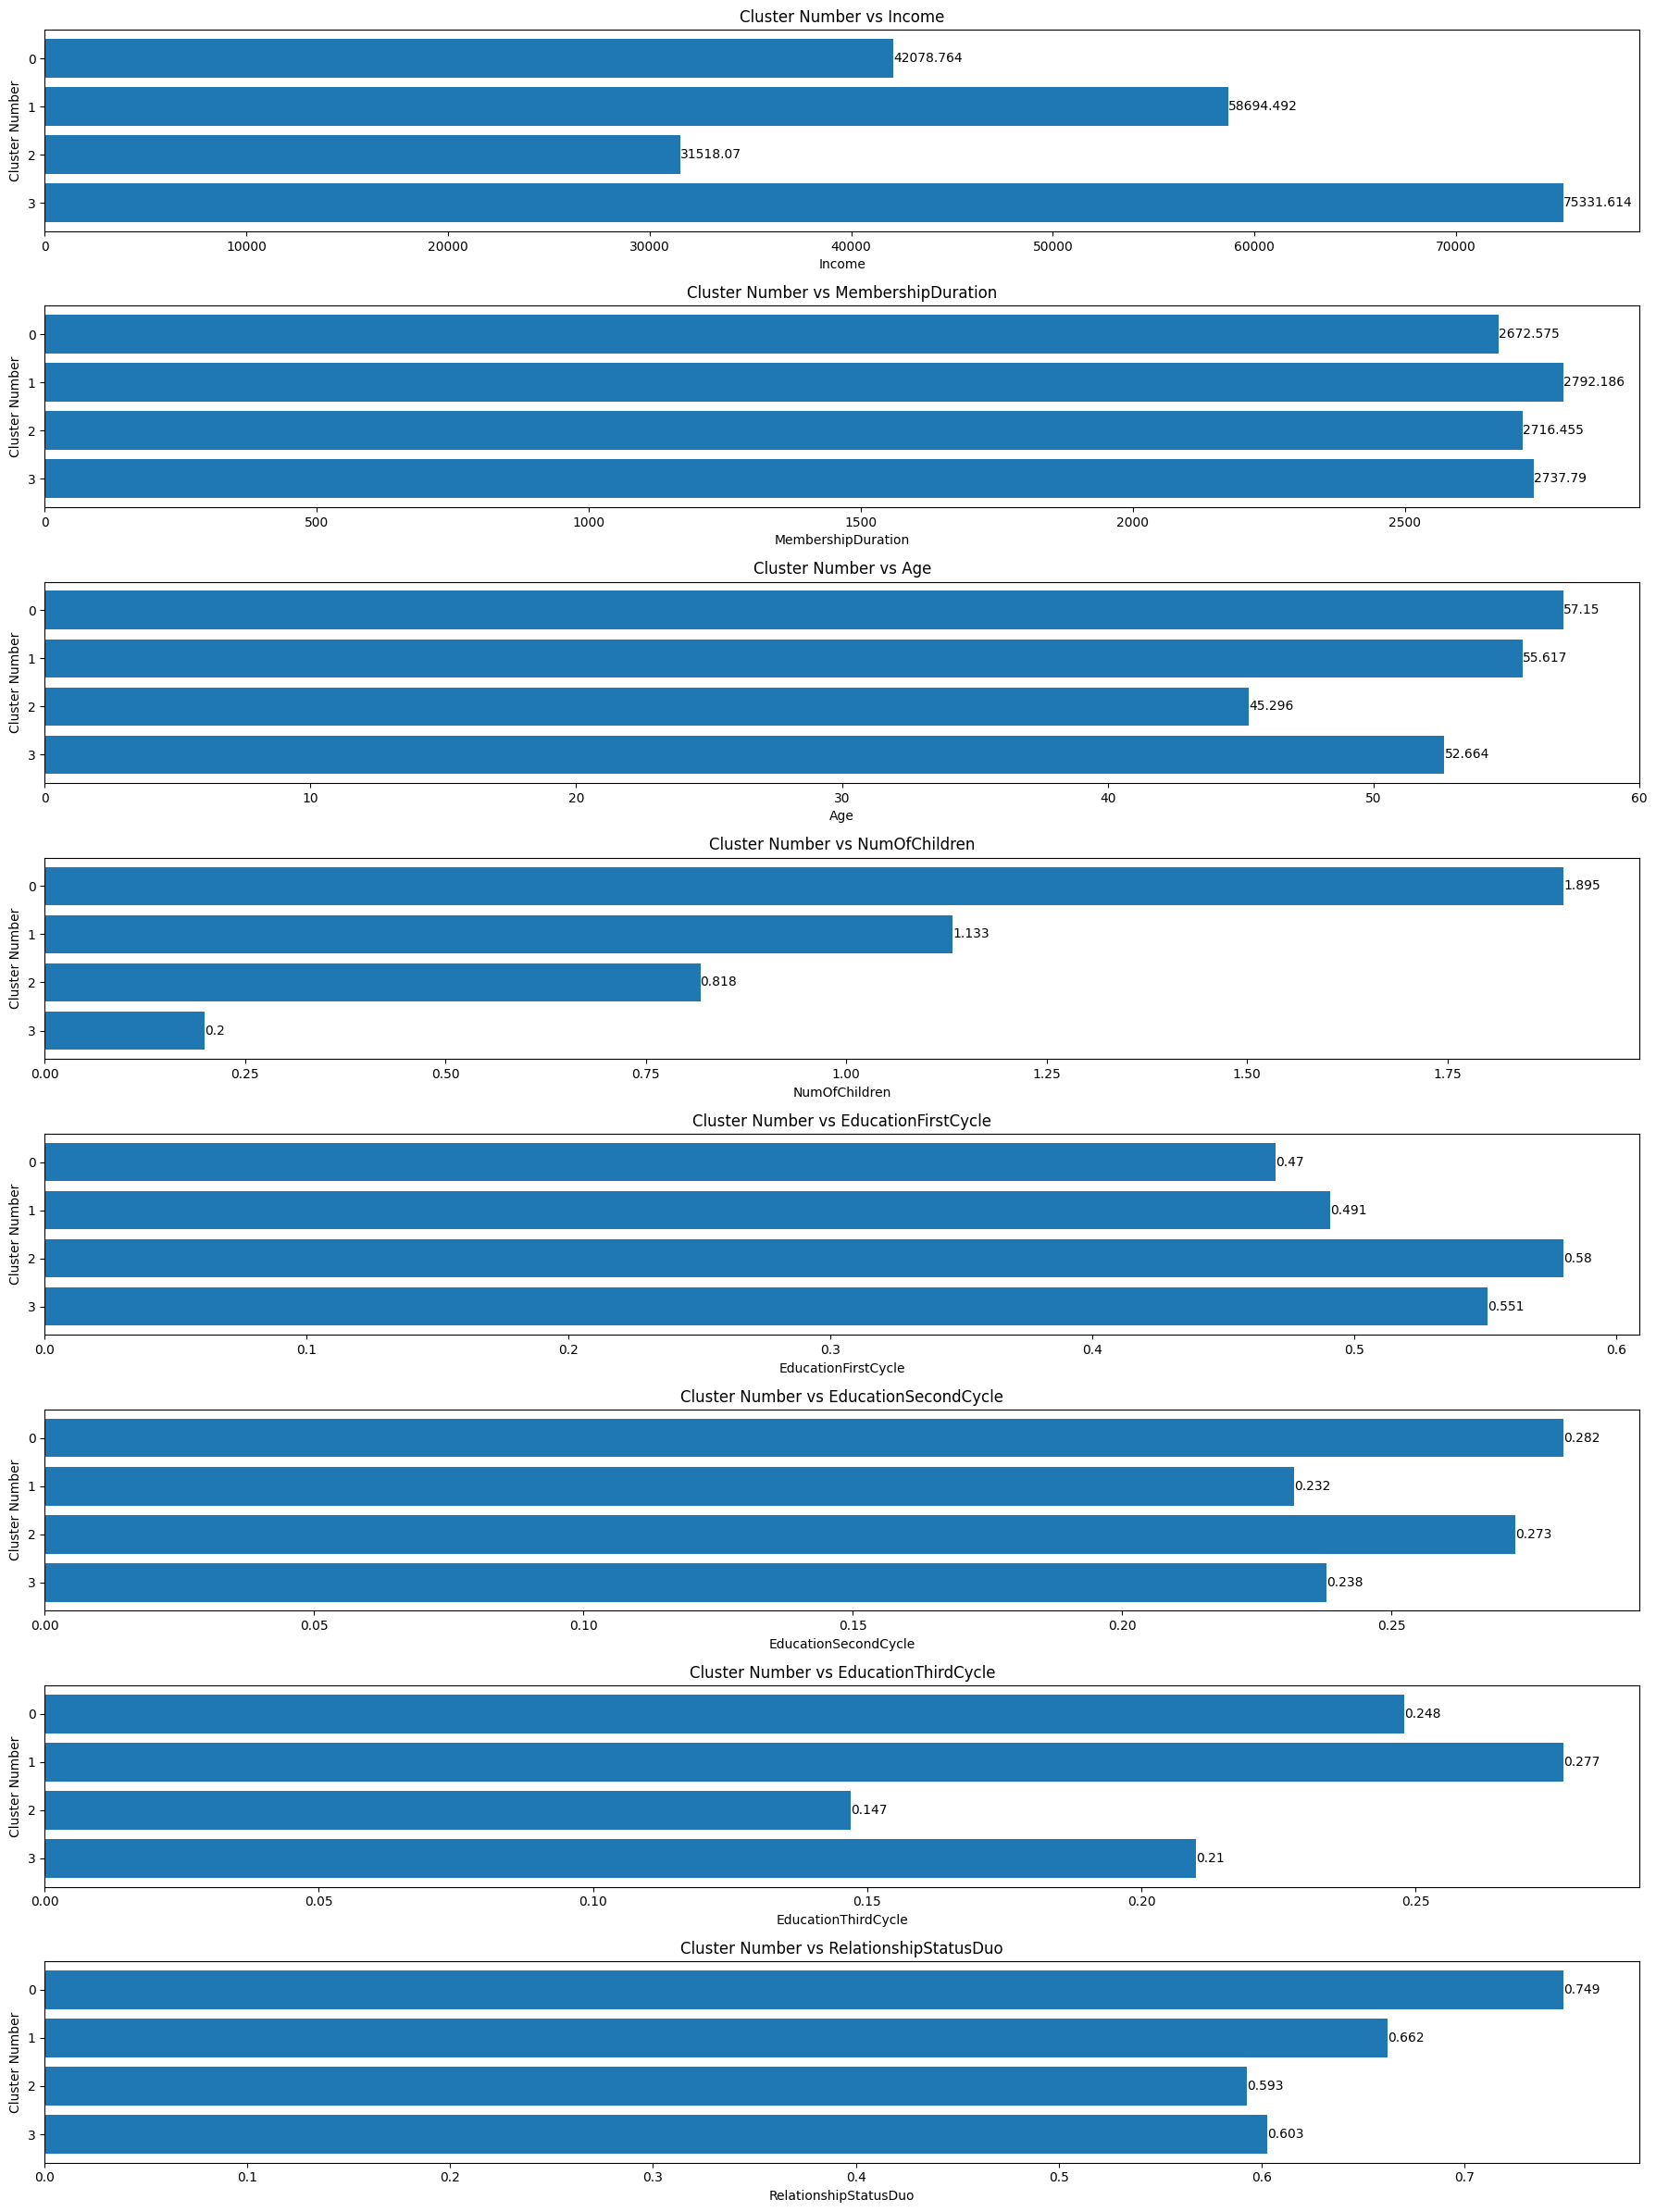

In [ ]:
filteredDemoColumns=["Income","MembershipDuration","Age","NumOfChildren","EducationFirstCycle","EducationSecondCycle","EducationThirdCycle","RelationshipStatusDuo"] 
plt.rcdefaults()
fig, axs = plt.subplots(8,figsize=(18, 24))
clusters = ["0","1","2","3"]
y_pos = np.arange(len(clusters))
for count,trait in enumerate(filteredDemoColumns):
  axs[count].barh(y_pos, profileData[trait], align='center')
  axs[count].set_yticks(y_pos, labels=clusters)
  axs[count].invert_yaxis()  # labels read top-to-bottom
  axs[count].set_xlabel(trait)
  axs[count].set_ylabel('Cluster Number')
  axs[count].set_title('Cluster Number vs '+trait)
  for i, v in enumerate(profileData[trait]):
      axs[count].text(v, i, str(v), color='black', fontsize=10, ha='left', va='center')
plt.tight_layout()
plt.show()

### Understanding Spending Behaviors of Customer Clusters

* Understanding spending behaviour of the 4 identified customer sectors
* Found that Cluster 1 is the biggest spender. while Cluster 2 is the smallest spenders and Cluster 3 makes the highest number of purchases with a discount while Cluster 1 is the lowest

Results: 
* Cluster 0:
 *   Percentage of Campaign Acceptance: 14.5%
 *   Percentage of Complaints: 0.89%
 *   Top 3 Product Categories with Highest Expenditure: Wine, Meat, Gold
 *   Ranking of Purchase Avenue: Store, Web, Catalog
* Cluster 1
 *   Percentage of Campaign Acceptance: 29.7%
 *   Percentage of Complaints: 1.28%
 *   Top 3 Product Categories with Highest Expenditure: Wine, Meat, Gold
 *   Ranking of Purchase Avenue: Store, Web, Catalog
* Cluster 2
 *   Percentage of Campaign Acceptance: 14.4%
 *   Percentage of Complaints: 1.06%
 *   Top 3 Product Categories with Highest Expenditure: Wine, Meat, Gold
 *   Ranking of Purchase Avenue: Store, Web, Catalog

* Cluster 3
 *   Percentage of Campaign Acceptance: 49.6%
 *   Percentage of Complaints: 0.35%
 *   Top 3 Product Categories with Highest Expenditure: Wine, Meat, Fish
 *   Ranking of Purchase Avenue: Store, Catalog, Web

Size of cluster 0 is 447
Size of cluster 1 is 548
Size of cluster 2 is 659
Size of cluster 3 is 575

Largest Spender overall across all cluster: Cluster 3
Smallest Spender overall across all cluster: Cluster 2

Largest Spender on Deals across all cluster: Cluster 1
Smallest Spender on Deals across all cluster: Cluster 3



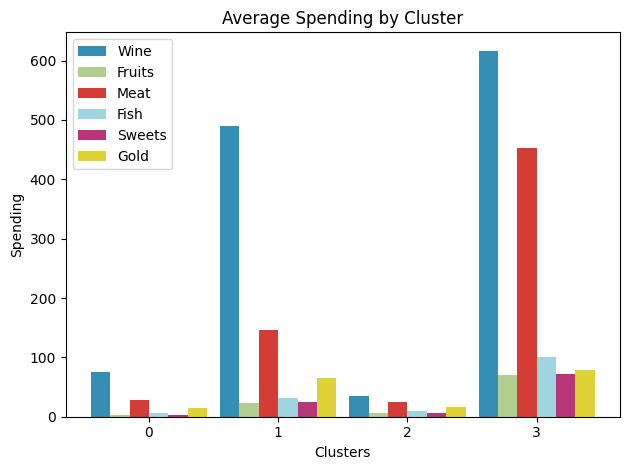

Cluster 0
Percentage of Complaints: 0.89%
Percentage of Campaign Acceptance: 14.54%

Cluster 1
Percentage of Complaints: 1.28%
Percentage of Campaign Acceptance: 29.74%

Cluster 2
Percentage of Complaints: 1.06%
Percentage of Campaign Acceptance: 14.42%

Cluster 3
Percentage of Complaints: 0.35%
Percentage of Campaign Acceptance: 49.57%



In [ ]:
behavioralColumns=["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","Complain","Expenditure","AcceptedCmpAll"]
data={}
for i in range(clusterNum):
  clusterData= cleanData[cleanData["Cluster"]==i]
  print("Size of cluster {clusterNum} is {clusterSize}".format(clusterNum=i, clusterSize=len(clusterData.index)))
  for behaviour in behavioralColumns:
    if behaviour not in data:
      data[behaviour]=[]
    data[behaviour].append(clusterData[behaviour].mean())

print("\nLargest Spender overall across all cluster: Cluster {clusterNum}".format(clusterNum=data["Expenditure"].index(max(data["Expenditure"]))))
print("Smallest Spender overall across all cluster: Cluster {clusterNum}\n".format(clusterNum=data["Expenditure"].index(min(data["Expenditure"]))))
print("Largest Spender on Deals across all cluster: Cluster {clusterNum}".format(clusterNum=data["NumDealsPurchases"].index(max(data["NumDealsPurchases"]))))
print("Smallest Spender on Deals across all cluster: Cluster {clusterNum}\n".format(clusterNum=data["NumDealsPurchases"].index(min(data["NumDealsPurchases"]))))

spendingCategories=["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
clusterCatData={}
catData={}
for i in range(clusterNum):
  clusterCatData[i]=[]
  for cat in spendingCategories:
    clusterCatData[i].append(data[cat][i])
    catData[cat]=data[cat]

n_groups = 4

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

plt.bar(index, catData["MntWines"], bar_width,
alpha=opacity,
color='b',
label='Wine')

plt.bar(index+ bar_width, catData["MntFruits"], bar_width,
alpha=opacity,
color='g',
label='Fruits')

plt.bar(index+ 2* bar_width, catData["MntMeatProducts"], bar_width,
alpha=opacity,
color='r',
label='Meat')

plt.bar(index+ 3*bar_width, catData["MntFishProducts"], bar_width,
alpha=opacity,
color='c',
label='Fish')

plt.bar(index+ 4*bar_width, catData["MntSweetProducts"], bar_width,
alpha=opacity,
color='m',
label='Sweets')

plt.bar(index+ 5*bar_width, catData["MntGoldProds"], bar_width,
alpha=opacity,
color='y',
label='Gold')

plt.xlabel('Clusters')
plt.ylabel('Spending')
plt.title('Average Spending by Cluster')
plt.xticks(index+ 2.5 * bar_width, ('0', '1', '2', '3'))
plt.legend()
plt.tight_layout()
plt.show()
for i in range(clusterNum):
  print("Cluster {clusterNum}".format(clusterNum=i))
  print("Percentage of Complaints: {:0.2f}%".format(data["Complain"][i]*100))
  print("Percentage of Campaign Acceptance: {:0.2f}%\n".format(data["AcceptedCmpAll"][i]*100))

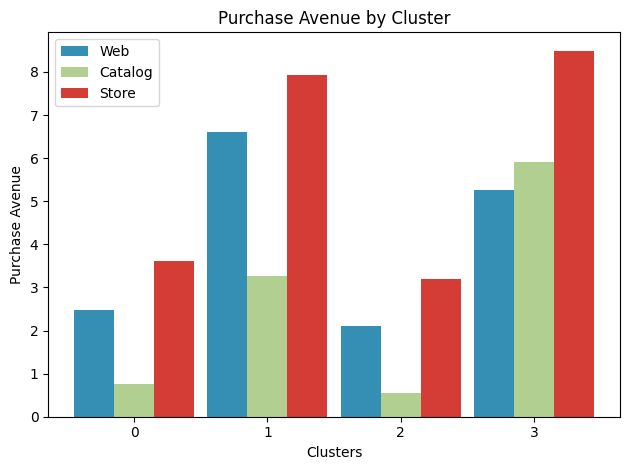

In [ ]:
spendingAvenue=["NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]
clusterAveData={}
for ave in spendingAvenue:
  clusterAveData[ave]=data[ave]
  
n_groups = 4
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

plt.bar(index, clusterAveData["NumWebPurchases"], bar_width,
alpha=opacity,
color='b',
label='Web')

plt.bar(index+ bar_width, clusterAveData["NumCatalogPurchases"], bar_width,
alpha=opacity,
color='g',
label='Catalog')

plt.bar(index+ 2* bar_width, clusterAveData["NumStorePurchases"], bar_width,
alpha=opacity,
color='r',
label='Store')

plt.xlabel('Clusters')
plt.ylabel('Purchase Avenue')
plt.title('Purchase Avenue by Cluster')
plt.xticks(index+ 1 * bar_width, ('0', '1', '2', '3'))
plt.legend()
plt.tight_layout()
plt.show()

# Conclusion
In this project, after exploring the dataset and performing relevant data preprocessing techniques, we employed various clustering methods based on an identified optimal cluster number in the data set. These clustering methods were evaluated against and K-Means was the best algorithm. From the 4 identified clusters, we profiled customers from these segments according to their demographic and behavioural characteristics.

Customers can be profiled via Income, Age, Number of Children, Education (specifically Third Cycle):

First Segment (Cluster 0)
1.   Medium-Low Income: ~42K
2.   Oldest Age Group: ~57 years old
3.   Highest Number of Children: 1.9
4.   Third-Cycle Education: 24.3%

Second Segment (Cluster 1)
1.   Highest Income: ~75K
2.   Medium-Low Age Group: ~52 years old
3.   Lowest Number of Children: 0.2
4.   Medium-Low Third-Cycle Education: 21%

Third Segment (Cluster 2)
1.   Lowest Income: ~32K
2.   Youngest Age Group: ~45 years old
3.   Medium-Low Number of Children: 0.8
4.   Lowest Third-Cycle Education: 15.2%

Fourth Segment (Cluster 3)
1.   Medium-High Income: ~59K
2.   Medium-High Age Group: ~55 years old
3.   Medium-High Number of Children: 1.1
4.   Highest Third-Cycle Education: 27.7%

Next we investigated their behavioural characteristics:

First Segment (Cluster 0)
*   Percentage of Campaign Acceptance: 14.8%
*   Percentage of Complaints: 0.91%
*   Top 3 Product Categories with Highest Expenditure: Wine, Meat, Gold
*   Ranking of Purchase Avenue: Store, Web, Catalog

Second Segment (Cluster 1)
*   Largest Spender
*   Smallest number of purchases made with a discount
*   Percentage of Campaign Acceptance: 49.6% (Highest)
*   Percentage of Complaints: 0.35%
*   Top 3 Product Categories with Highest Expenditure: Wine, Meat, Fish
*   Ranking of Purchase Avenue: Store, Catalog, Web

Third Segment (Cluster 2)
*   Smallest Spender
*   Percentage of Campaign Acceptance: 14.3%
*   Percentage of Complaints: 1.05%
*   Top 3 Product Categories with Highest Expenditure: Wine, Meat, Gold
*   Ranking of Purchase Avenue: Store, Web, Catalog

Fourth Segment (Cluster 3)
*   Highest number of purchases made with a discount
*   Percentage of Campaign Acceptance: 29.7%
*   Percentage of Complaints: 1.28% (Highest)
*   Top 3 Product Categories with Highest Expenditure: Wine, Meat, Gold
*   Ranking of Purchase Avenue: Store, Web, Catalog

Implications for the supermarket:
*   Most valuable customers are Cluster 1 due to their highest expenditure
*   Top Product Categories to promote: Wine, Meat, Fish and Gold
*   Campaigns should be targeted towards customers of the Second Segment
*   Deals should be targeted towards customers of the Fourth Segment
*   Supermarkets should focus on in-store advertising for all customers
*  On the web, supermarkets should focus on customers of the first, third and fourth segments
*  In catalogs, supermarkets should focus on customers of the second segment

Limitations:
*   We are not aware of the profit margins for each product category and make recommendations through sales volume